<a href="https://colab.research.google.com/github/bourrich90/Spoon-Knife/blob/main/Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Audit + Exploration des données**

**1.1.Avant Aggrégation  des données par jour**

## *a- Chargement de données :*

In [ ]:
# import des bibliothéques
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# charger le jeu de données bike 

data = pd.read_csv('https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/bike.csv')
data['dteday'] = pd.to_datetime(data.dteday, format='%Y-%m-%d')

# ajout de la colonne weekday pour le jour de semaine
data["weekday"]=data["dteday"].dt.day_name()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   hr          17379 non-null  int64         
 2   weathersit  17379 non-null  object        
 3   hum         17379 non-null  float64       
 4   windspeed   17379 non-null  float64       
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   cnt         17379 non-null  int64         
 8   weekday     17379 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 1.2+ MB


Le jeu de données de bike contient 7 variables explicatives (dteday,hr,weathersit,hum,windspeed,temp,atemp) et une variable cible expliquée cnt, pas de NAN dans les données . L'objectif est de prédire le nombre de vélos utilisés d'un jour au lendemain . Il s'agit d'une problématique de regression puisque la cible cnt est **quantitative**






In [ ]:
# déscription des données
data.describe()

,hr,hum,windspeed,temp,atemp,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.627229,12.736540,15.358397,15.401157,189.463088
std,6.914405,0.192930,8.196795,9.050138,11.342114,181.387599
min,0.000000,0.000000,0.000000,-7.060000,-16.000000,1.000000
25%,6.000000,0.480000,7.001500,7.980000,5.997800,40.000000
50%,12.000000,0.630000,12.998000,15.500000,15.996800,142.000000
75%,18.000000,0.780000,16.997900,23.020000,24.999200,281.000000
max,23.000000,1.000000,56.996900,39.000000,50.000000,977.000000


In [ ]:
data.head()

,dteday,hr,weathersit,hum,windspeed,temp,atemp,cnt,weekday
0,2011-01-01,0,clear,0.81,0.0,3.28,3.0014,16,Saturday
1,2011-01-01,1,clear,0.80,0.0,2.34,1.9982,40,Saturday
2,2011-01-01,2,clear,0.80,0.0,2.34,1.9982,32,Saturday
3,2011-01-01,3,clear,0.75,0.0,3.28,3.0014,13,Saturday
4,2011-01-01,4,clear,0.75,0.0,3.28,3.0014,1,Saturday


## *b-Visulisation de données :*

Premiére analyse graphique ci-dessous de la variable cnt avec des boxplots montre qu'il y'a beaucoup d'outliers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


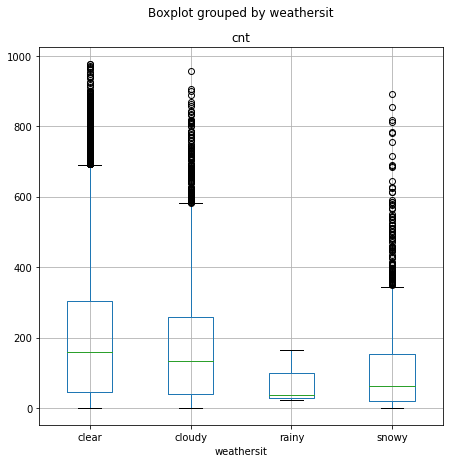

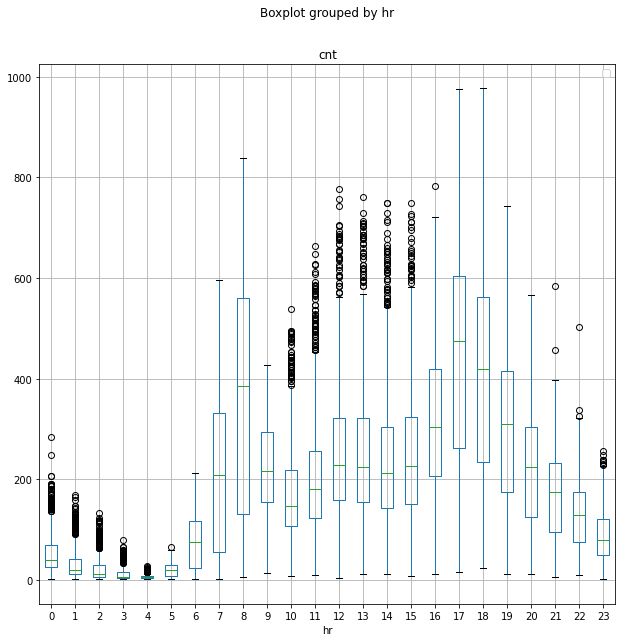

In [ ]:

data.boxplot(column= 'cnt', by='weathersit', figsize= (7,7));
data.boxplot(column= 'cnt', by='hr', figsize= (10,10));
plt.legend();

Le graphe ci-dessous affiche le décompte du nombre de vélos utilisés par heure sur toute l'année . On voit clairement l'évolution du décompte de vélos pendant la plage horaire    [8h - 20h]

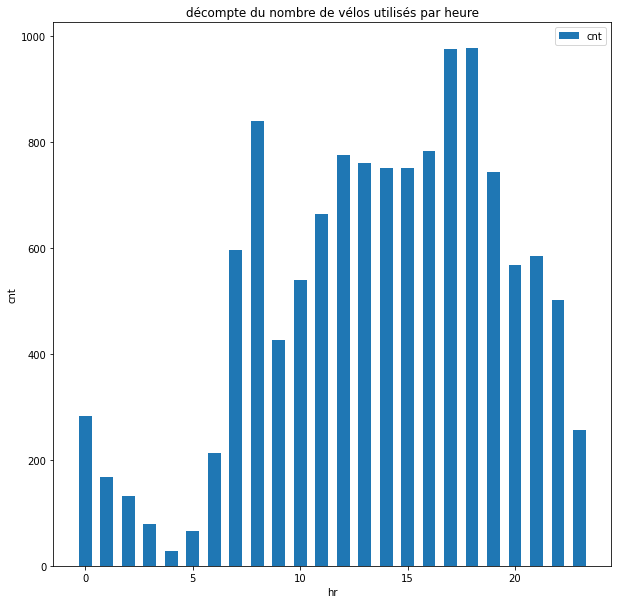

In [ ]:
plt.figure( figsize= (10, 10) )
plt.bar(data.hr, data.cnt, width = 0.6, label = "cnt")
plt.xlabel('hr')
plt.ylabel('cnt')
plt.title("décompte du nombre de vélos utilisés par heure")
plt.legend();

**1.2.Aprés Aggrégation  des données par jour**

1.2.1.Aggrégation des données par jour de l'année

Nous allons maintenant aggréer les données par jour de l'année , en utilsant un groupby sur 'dteday' , le nouveau jeu de données est nommé 'data_jour_annee'

In [ ]:
#modalitie_weathersit renvoie la modalité de weathersit pour chaque 24h

modalitie_weathersit =  lambda weathersit: weathersit.value_counts().index[0]

# fonction qui passera en argument de agg et qui utilise la moyenne et somme pour les variables quantitatives
functions_to_apply = {
    
    'weathersit' : modalitie_weathersit,
    'hum' : 'mean',
    'windspeed' : 'mean',
    'temp' : 'mean',
    'atemp' : 'mean',
    'cnt' : 'sum'
  
}
#le nouveau jeu de données par jour de l'année est nommé 'data_jour_annee' 
data_jour_annee = data.groupby('dteday').agg(functions_to_apply)

data_jour_annee


,weathersit,hum,windspeed,temp,atemp,cnt
dteday,,,,,,
2011-01-01,clear,0.805833,10.749871,8.175833,7.999250,985
2011-01-02,cloudy,0.696087,16.652122,9.083478,7.346783,801
2011-01-03,clear,0.437273,16.636709,1.229091,-3.499300,1349
2011-01-04,clear,0.590435,10.739809,1.400000,-1.999965,1562
2011-01-05,clear,0.436957,12.522300,2.666957,-0.868209,1600
...,...,...,...,...,...,...
2012-12-27,cloudy,0.652917,23.458933,3.945833,-1.041650,2114
2012-12-28,cloudy,0.590000,10.416546,3.906667,0.833025,3095
2012-12-29,cloudy,0.752917,8.333683,3.906667,-0.001600,1341


In [ ]:
# déscription des données
data_jour_annee.describe()

,hum,windspeed,temp,atemp,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.627894,12.762577,15.283085,15.307363,4504.348837
std,0.142429,5.192357,8.603397,10.755437,1937.211452
min,0.000000,1.500242,-5.220870,-10.781409,22.000000
25%,0.520000,9.041650,7.842917,6.297604,3152.000000
50%,0.626667,12.125325,15.421667,16.124400,4548.000000
75%,0.730208,15.625377,22.804583,24.167738,5956.000000
max,0.972500,33.999988,32.498333,39.499125,8714.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


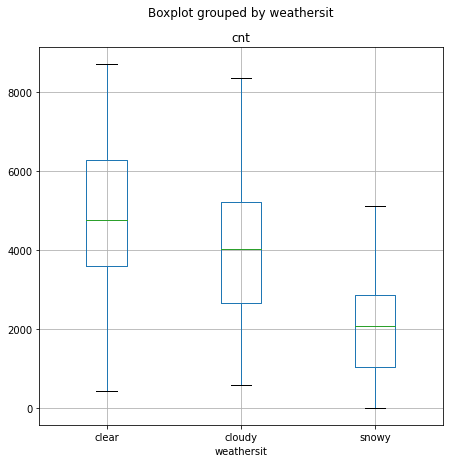

In [ ]:
data_jour_annee.boxplot(column= 'cnt', by='weathersit', figsize= (7,7));

Aprés aggrégation des données par jour de l'année on constate que le graphe boxplot de 'cnt' par 'weathersit'  ne contient plus d'outliers

**A-Analyse des liaisons entre les variables**

Nous allons maintenant étudier la liaison entre les variables quantitatives du jeu de données dadata_jour_annee a l'aide de la matrice de corrélation. D'aprés les résultats ci-dessous il existe une corrélation considérable entre cnt et temp et aussi entre cnt et atemp

In [ ]:
# corrélation considérable entre cnt et temp (pearson_coeff = 0.62)  et aussi entre cnt et atemp (pearson_coeff = 0.63)
data_jour_annee.corr()

,hum,windspeed,temp,atemp,cnt
hum,1.000000,-0.248489,0.126963,0.139988,-0.100659
windspeed,-0.248489,1.000000,-0.157944,-0.183643,-0.234545
temp,0.126963,-0.157944,1.000000,0.991702,0.627494
atemp,0.139988,-0.183643,0.991702,1.000000,0.631066
cnt,-0.100659,-0.234545,0.627494,0.631066,1.000000


In [ ]:
pd.DataFrame(pearsonr(data_jour_annee['temp'], data_jour_annee['cnt']), index=['pearson_coeff','p-value'], columns=['resultat_test'])


,resultat_test
pearson_coeff,6.274940e-01
p-value,2.810632e-81


In [ ]:
pd.DataFrame(pearsonr(data_jour_annee['atemp'], data_jour_annee['cnt']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,6.310656e-01
p-value,1.854615e-82


Intéressons nous maintenant a l'analyse de liaison entre cnt des 7 derniers jours et le cnt du lendemain , pour cela crions un nouveau dataframe data_derniers_jours qui ajoute 7 nouvelles colones cnt_j-1 , cnt_j-2 , cnt_j-3 ,cnt_j-4 , cnt_j-5 , cnt_j-6 et cnt_j-7

In [ ]:
#prenons une copie de data_jour_annee
data_derniers_jours = data_jour_annee.copy()
data_derniers_jours.head()


,weathersit,hum,windspeed,temp,atemp,cnt
dteday,,,,,,
2011-01-01,clear,0.805833,10.749871,8.175833,7.999250,985
2011-01-02,cloudy,0.696087,16.652122,9.083478,7.346783,801
2011-01-03,clear,0.437273,16.636709,1.229091,-3.499300,1349
2011-01-04,clear,0.590435,10.739809,1.400000,-1.999965,1562
2011-01-05,clear,0.436957,12.522300,2.666957,-0.868209,1600


In [ ]:
#ajoutons 7 nouvelles colonnes cnt_j-1 , cnt_j-2 , cnt_j-3 ,cnt_j-4 , cnt_j-5 , cnt_j-6 et cnt_j-7 , il manquera quleques lignes dans ces colonnes qui sont a NA , on les remplacera par la moyenne de la colonne
# intilisation des colonnes a nan
data_derniers_jours['cnt_j_1'] = np.nan
data_derniers_jours['cnt_j_2'] = np.nan
data_derniers_jours['cnt_j_3'] = np.nan
data_derniers_jours['cnt_j_4'] = np.nan
data_derniers_jours['cnt_j_5'] = np.nan
data_derniers_jours['cnt_j_6'] = np.nan
data_derniers_jours['cnt_j_7'] = np.nan

# récupération des 7 derniers jours
data_derniers_jours['cnt_j_1'][1:] = data_derniers_jours.cnt[:-1]
data_derniers_jours['cnt_j_2'][2:] = data_derniers_jours.cnt[0:-2]
data_derniers_jours['cnt_j_3'][3:] = data_derniers_jours.cnt[0:-3]
data_derniers_jours['cnt_j_4'][4:] = data_derniers_jours.cnt[0:-4]
data_derniers_jours['cnt_j_5'][5:] = data_derniers_jours.cnt[0:-5]
data_derniers_jours['cnt_j_6'][6:] = data_derniers_jours.cnt[0:-6]
data_derniers_jours['cnt_j_7'][7:] = data_derniers_jours.cnt[0:-7]
data_derniers_jours.head(10)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Se

,weathersit,hum,windspeed,temp,atemp,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
dteday,,,,,,,,,,,,,
2011-01-01,clear,0.805833,10.749871,8.175833,7.999250,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,cloudy,0.696087,16.652122,9.083478,7.346783,801,985.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,clear,0.437273,16.636709,1.229091,-3.499300,1349,801.0,985.0,NaN,NaN,NaN,NaN,NaN
2011-01-04,clear,0.590435,10.739809,1.400000,-1.999965,1562,1349.0,801.0,985.0,NaN,NaN,NaN,NaN
2011-01-05,clear,0.436957,12.522300,2.666957,-0.868209,1600,1562.0,1349.0,801.0,985.0,NaN,NaN,NaN
2011-01-06,clear,0.518261,6.000870,1.604348,-0.608226,1606,1600.0,1562.0,1349.0,801.0,985.0,NaN,NaN
2011-01-07,cloudy,0.498696,11.304648,1.236522,-2.216617,1510,1606.0,1600.0,1562.0,1349.0,801.0,985.0,NaN
2011-01-08,clear,0.535833,17.875879,-0.245000,-5.291225,959,1510.0,1606.0,1600.0,1562.0,1349.0,801.0,985.0
2011-01-09,clear,0.434167,24.250650,-1.498333,-8.332450,822,959.0,1510.0,1606.0,1600.0,1562.0,1349.0,801.0


In [ ]:
data_derniers_jours.tail(10)

,weathersit,hum,windspeed,temp,atemp,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
dteday,,,,,,,,,,,,,
2012-12-22,clear,0.441250,27.292171,4.494167,-0.416575,1749,3623.0,4128.0,5267.0,5557.0,4585.0,3786.0,5047.0
2012-12-23,clear,0.515417,8.916583,3.554167,1.125075,1787,1749.0,3623.0,4128.0,5267.0,5557.0,4585.0,3786.0
2012-12-24,snowy,0.791304,5.174439,2.871304,1.087400,920,1787.0,1749.0,3623.0,4128.0,5267.0,5557.0,4585.0
2012-12-25,cloudy,0.734783,11.304648,5.691304,3.434704,1013,920.0,1787.0,1749.0,3623.0,4128.0,5267.0,5557.0
2012-12-26,snowy,0.823333,21.208571,3.436667,-1.458000,441,1013.0,920.0,1787.0,1749.0,3623.0,4128.0,5267.0
2012-12-27,cloudy,0.652917,23.458933,3.945833,-1.041650,2114,441.0,1013.0,920.0,1787.0,1749.0,3623.0,4128.0
2012-12-28,cloudy,0.590000,10.416546,3.906667,0.833025,3095,2114.0,441.0,1013.0,920.0,1787.0,1749.0,3623.0
2012-12-29,cloudy,0.752917,8.333683,3.906667,-0.001600,1341,3095.0,2114.0,441.0,1013.0,920.0,1787.0,1749.0
2012-12-30,clear,0.483333,23.500529,4.024167,-0.707800,1796,1341.0,3095.0,2114.0,441.0,1013.0,920.0,1787.0


In [ ]:
data_derniers_jours.describe()

,hum,windspeed,temp,atemp,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
count,731.000000,731.000000,731.000000,731.000000,731.000000,730.000000,729.000000,728.000000,727.000000,726.000000,725.000000,724.000000
mean,0.627894,12.762577,15.283085,15.307363,4504.348837,4506.780822,4510.499314,4514.853022,4516.806052,4520.115702,4525.742069,4530.593923
std,0.142429,5.192357,8.603397,10.755437,1937.211452,1937.422669,1936.144350,1933.901301,1934.514168,1933.787097,1929.166565,1926.068726
min,0.000000,1.500242,-5.220870,-10.781409,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
25%,0.520000,9.041650,7.842917,6.297604,3152.000000,3169.750000,3190.000000,3193.000000,3199.000000,3206.500000,3214.000000,3214.000000
50%,0.626667,12.125325,15.421667,16.124400,4548.000000,4548.500000,4549.000000,4551.000000,4553.000000,4558.000000,4563.000000,4566.000000
75%,0.730208,15.625377,22.804583,24.167738,5956.000000,5966.000000,5976.000000,5978.500000,5981.000000,5983.500000,5986.000000,5987.500000
max,0.972500,33.999988,32.498333,39.499125,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000,8714.000000


In [ ]:
# remplaçons les valeurs zéro par la moyenne 
data_derniers_jours = data_derniers_jours.fillna(data_derniers_jours.mean())
data_derniers_jours.head(10)

,weathersit,hum,windspeed,temp,atemp,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
dteday,,,,,,,,,,,,,
2011-01-01,clear,0.805833,10.749871,8.175833,7.999250,985,4506.780822,4510.499314,4514.853022,4516.806052,4520.115702,4525.742069,4530.593923
2011-01-02,cloudy,0.696087,16.652122,9.083478,7.346783,801,985.000000,4510.499314,4514.853022,4516.806052,4520.115702,4525.742069,4530.593923
2011-01-03,clear,0.437273,16.636709,1.229091,-3.499300,1349,801.000000,985.000000,4514.853022,4516.806052,4520.115702,4525.742069,4530.593923
2011-01-04,clear,0.590435,10.739809,1.400000,-1.999965,1562,1349.000000,801.000000,985.000000,4516.806052,4520.115702,4525.742069,4530.593923
2011-01-05,clear,0.436957,12.522300,2.666957,-0.868209,1600,1562.000000,1349.000000,801.000000,985.000000,4520.115702,4525.742069,4530.593923
2011-01-06,clear,0.518261,6.000870,1.604348,-0.608226,1606,1600.000000,1562.000000,1349.000000,801.000000,985.000000,4525.742069,4530.593923
2011-01-07,cloudy,0.498696,11.304648,1.236522,-2.216617,1510,1606.000000,1600.000000,1562.000000,1349.000000,801.000000,985.000000,4530.593923
2011-01-08,clear,0.535833,17.875879,-0.245000,-5.291225,959,1510.000000,1606.000000,1600.000000,1562.000000,1349.000000,801.000000,985.000000
2011-01-09,clear,0.434167,24.250650,-1.498333,-8.332450,822,959.000000,1510.000000,1606.000000,1600.000000,1562.000000,1349.000000,801.000000


In [ ]:
data_derniers_jours.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weathersit  731 non-null    object 
 1   hum         731 non-null    float64
 2   windspeed   731 non-null    float64
 3   temp        731 non-null    float64
 4   atemp       731 non-null    float64
 5   cnt         731 non-null    int64  
 6   cnt_j_1     731 non-null    float64
 7   cnt_j_2     731 non-null    float64
 8   cnt_j_3     731 non-null    float64
 9   cnt_j_4     731 non-null    float64
 10  cnt_j_5     731 non-null    float64
 11  cnt_j_6     731 non-null    float64
 12  cnt_j_7     731 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 80.0+ KB


Nous allons maintenant étudier la liaison entre le nombre de vélo sur les derniers jours et le nombre de vélo du lendemain  a l'aide de la matrice de corrélation. On constate une corrélation  importante entre nombre de vélos  du jour et le nombre de vélos des 7 derniers jours

In [ ]:
#   corrélation  importante entre nombre de vélos  du jour et le nombre de vélos des 7 derniers jours
data_derniers_jours.corr()

,hum,windspeed,temp,atemp,cnt,cnt_j_1,cnt_j_2,cnt_j_3,cnt_j_4,cnt_j_5,cnt_j_6,cnt_j_7
hum,1.000000,-0.248489,0.126963,0.139988,-0.100659,0.008887,0.071084,0.082987,0.095215,0.078759,0.059905,0.053231
windspeed,-0.248489,1.000000,-0.157944,-0.183643,-0.234545,-0.167060,-0.112344,-0.121678,-0.142588,-0.134897,-0.143599,-0.142892
temp,0.126963,-0.157944,1.000000,0.991702,0.627494,0.621955,0.600318,0.580291,0.574516,0.576978,0.573659,0.559841
atemp,0.139988,-0.183643,0.991702,1.000000,0.631066,0.624171,0.599902,0.579285,0.574139,0.576939,0.573284,0.559966
cnt,-0.100659,-0.234545,0.627494,0.631066,1.000000,0.846665,0.780866,0.748545,0.739505,0.745766,0.760718,0.746737
cnt_j_1,0.008887,-0.167060,0.621955,0.624171,0.846665,1.000000,0.846526,0.780683,0.748321,0.739135,0.745795,0.760569
cnt_j_2,0.071084,-0.112344,0.600318,0.599902,0.780866,0.846526,1.000000,0.846069,0.780604,0.747718,0.738305,0.744964
cnt_j_3,0.082987,-0.121678,0.580291,0.579285,0.748545,0.780683,0.846069,1.000000,0.846287,0.780063,0.746607,0.737218
cnt_j_4,0.095215,-0.142588,0.574516,0.574139,0.739505,0.748321,0.780604,0.846287,1.000000,0.846241,0.780603,0.746734
cnt_j_5,0.078759,-0.134897,0.576978,0.576939,0.745766,0.739135,0.747718,0.780063,0.846241,1.000000,0.846119,0.780085


In [ ]:
pd.DataFrame(pearsonr(data_derniers_jours['cnt'], data_derniers_jours['cnt_j_1']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,8.466652e-01
p-value,6.412583e-202


Text(0, 0.5, 'cnt_j_1')

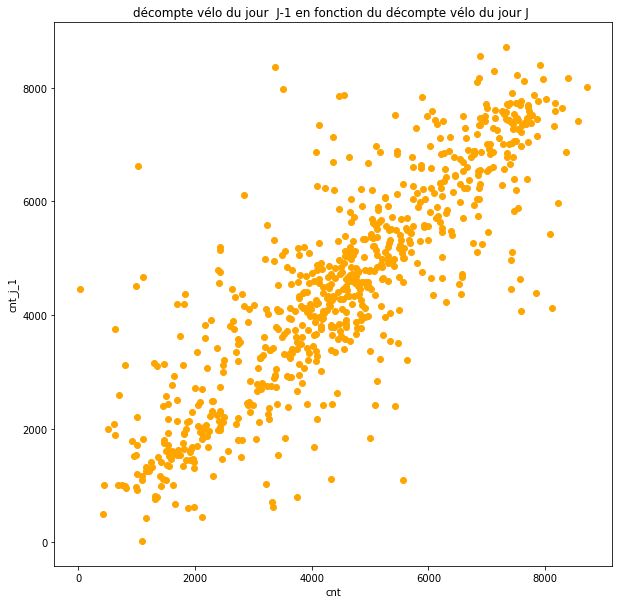

In [ ]:
plt.figure( figsize= (10, 10) )
plt.scatter(data_derniers_jours.cnt, data_derniers_jours.cnt_j_1, c = 'orange');
plt.title('décompte vélo du jour  J-1 en fonction du décompte vélo du jour J ')
plt.xlabel('cnt')
plt.ylabel('cnt_j_1');



Le graphe de nuages ci-dessus affiche le décompte vélo du jour  J-1 en fonction du décompte vélo du jour J . On constate que la forme de cette courbe est plutot ptoche d'une droite linéaire ce qui confirme la corrélation entre les variables 'cnt_j_1' et 'cnt'

1.2.2.Aggrégation des données par jour de la semaine

Nous allons maintenant aggréer les données par jour de la semaine , en utilsant un groupby sur 'dteday' , le nouveau jeu de données est nommé 'data_jour_semaine'

In [ ]:
#modalitie_weathersit renvoie la modalité de weathersit pour chaque jour de semaine 

modalitie_weathersit =  lambda weathersit: weathersit.value_counts().index[0]

# fonction qui passera en argument de agg et qui utilise la moyenne et somme pour les variables quantitatives
functions_to_apply = {
    
    'weathersit' : modalitie_weathersit,
    'hum' : 'mean',
    'windspeed' : 'mean',
    'temp' : 'mean',
    'atemp' : 'mean',
    'cnt' : 'mean'
  
}
#le nouveau jeu de données par jour de la semaine est nommé 'data_jour_semaine' 
data_jour_semaine = data.groupby('weekday').agg(functions_to_apply)

data_jour_semaine


,weathersit,hum,windspeed,temp,atemp,cnt
weekday,,,,,,
Friday,clear,0.613840,12.490831,15.332183,15.140652,196.135907
Monday,clear,0.635651,12.653819,15.267180,15.409916,183.744655
Saturday,clear,0.619084,13.144739,14.646815,14.485994,190.209793
Sunday,clear,0.627994,12.602223,14.739584,14.723438,177.468825
Thursday,clear,0.609628,12.863143,15.829818,16.011408,196.436665
Tuesday,clear,0.639833,12.858461,15.902748,16.153847,191.238891
Wednesday,clear,0.644820,12.540538,15.813713,15.912843,191.130505


In [ ]:
#data_jour_semaine.corr()

In [ ]:

# déscription des données
data_jour_semaine.describe()

,hum,windspeed,temp,atemp,cnt
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.627264,12.736251,15.361720,15.405442,189.480749
std,0.013511,0.231370,0.520269,0.653887,6.784901
min,0.609628,12.490831,14.646815,14.485994,177.468825
25%,0.616462,12.571380,15.003382,14.932045,186.977224
50%,0.627994,12.653819,15.332183,15.409916,191.130505
75%,0.637742,12.860802,15.821766,15.962125,193.687399
max,0.644820,13.144739,15.902748,16.153847,196.436665


Le graphe ci-dessous affiche le décompte du nombre de vélos utilisés par par jour de semaine , on remarque que l'utilisation de vélo est pendant le weekend est inférieure a celle des jours ouvrés . Du lundi au Vendredi le décompte est presque stable

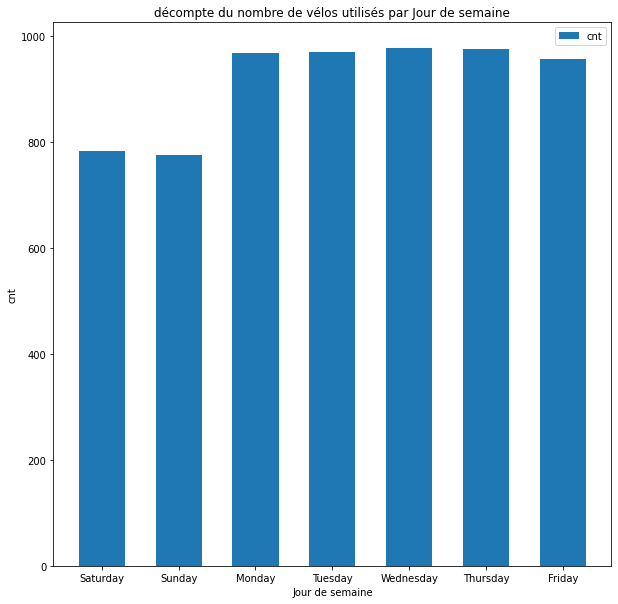

In [ ]:
plt.figure( figsize= (10, 10) )
plt.bar(data.weekday , data.cnt, width = 0.6, label = "cnt")
plt.xlabel('Jour de semaine')
plt.ylabel('cnt')
plt.title("décompte du nombre de vélos utilisés par Jour de semaine")
plt.legend();

# **2.Entraînement et évaluation de modèles de machine texte**

Nous avons fait le choix d'utiliser la validation croisée pour entrainter notre jeu de données 'data_jour_annee'

In [ ]:
# Instanciation du dataframe contenant les variables explicatives

X = data_jour_annee.drop(columns=['weathersit','cnt'])

# Instanciation de la series contenant la variable cible 

y = data_jour_annee.cnt

X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hum        731 non-null    float64
 1   windspeed  731 non-null    float64
 2   temp       731 non-null    float64
 3   atemp      731 non-null    float64
dtypes: float64(4)
memory usage: 28.6 KB


In [ ]:
# A partir du module linear_model de la librairie scikit learn on importe la fonction LinearRegression

from sklearn.linear_model import LinearRegression 

# A partir du module model_selection de la librairie scikit learn on importe la fonction cross_validate et KFold

from sklearn.model_selection import cross_val_score, KFold

model=LinearRegression() 

#on utilise shuffle afin de mélanger les observations du dataset

folds = KFold(n_splits = 7, shuffle = True, random_state=42)

performances_r2 = cross_val_score(model, X, y, scoring='r2', cv=folds)
performances_root_mean_squared_error = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=folds)
print("Les performances du coefficient de détermination  sur chacun des splits est de: :",performances_r2)

print("La performance moyenne du coefficient de détermination est de: :",np.mean(performances_r2))

print("Les performances de l'erreur absolue moyenne sur chacun des splits est de:",performances_root_mean_squared_error)

Les performances du coefficient de détermination  sur chacun des splits est de: : [0.54315439 0.27981623 0.32183376 0.55110437 0.45331376 0.36468486
 0.49571786]
La performance moyenne du coefficient de détermination est de: : 0.42994645919471053
Les performances de l'erreur absolue moyenne sur chacun des splits est de: [-1383.93542895 -1661.80695073 -1561.63333212 -1251.25171816
 -1467.80278034 -1431.19189712 -1350.66292901]


Le coefficient de détermination moyen est de 0.42 .Cette valeur reste moyenne trés ce qui nous donne une idée d'une adéquation moyenne  entre le modèle et les données 